In [1]:
############################
### import modules

import sys
import uproot
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import csv
import io
import matplotlib.colors as colors
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
import astropy
from astropy import stats
import os

###########################

np.set_printoptions(suppress=True)
os.chdir("../data")  # moves working directory to data folder

In [2]:
def optim_bins(mult_arry):
    # optimises bin widths based on Freedman rule of thumb, takes multidimensional array
    
    width_arry = np.array([])
    
    for arry in mult_arry: 
        width_temp = astropy.stats.freedman_bin_width(arry, return_bins=False)
        width_arry = np.append(width_arry, width_temp)
    
    energy_res = np.max(width_arry)
    flat_arry = np.concatenate(mult_arry, axis=0)
    
    return int(round((np.max(flat_arry) - np.min(flat_arry)) / energy_res, 0))

def hist_weights(rates, data):
    # returns weights of normalised histogram
    
    weights = []
    i = 0

    for event in data:
        weight = (rates[i]*np.ones_like(event))/len(event) #fraction = expected events / num of events generated
        weights.append(weight)
        i += 1
    
    return weights

def root_input(filename):
    # takes marsum configured MARLEY input file 
    
    rTree = uproot.open(filename)
    
    rTree_event = rTree['mst']
    Ex = np.array(rTree_event['Ex'])
    Ev = np.array(rTree_event['Ev'])
    KEl = np.array(rTree_event['KEl'])
    pdgp = np.array(rTree_event['pdgp'])
    Ep = np.array(rTree_event['Ep'])
    xsec = np.array(rTree_event['xsec'])
    
    return Ex, Ev, KEl, pdgp, Ep, xsec

filename = 'bahcallB8marley.root'
Ex, Ev, KEl, pdgp, Ep, xsec = root_input(filename)

print(Ev)
print(Ex)
print(KEl)
print(pdgp)
print(Ep)
print(xsec)

[ 6.67815209  8.9666489   6.34483666 ...  8.28816263 12.28981065
  6.24772501]
[2.73036 4.3837  2.73036 ... 4.3837  2.28987 2.73036]
[2.44280279 3.07719327 2.10905541 ... 2.39956469 8.49296297 2.01214304]
[array([22, 22, 22], dtype=int32) array([22, 22, 22], dtype=int32)
 array([22, 22, 22], dtype=int32) ... array([22, 22, 22], dtype=int32)
 array([22, 22, 22], dtype=int32) array([22, 22, 22], dtype=int32)]
[array([1.08655334, 1.61403711, 0.02982929])
 array([1.63692356, 2.71750975, 0.02983458])
 array([1.08664498, 1.61391727, 0.02983598]) ...
 array([1.63664772, 2.7174117 , 0.02982795])
 array([0.64628087, 1.61413254, 0.02983125])
 array([1.08673942, 1.61398716, 0.02982606])]
[2.84059797 2.84059797 2.84059797 ... 2.84059797 2.84059797 2.84059797]


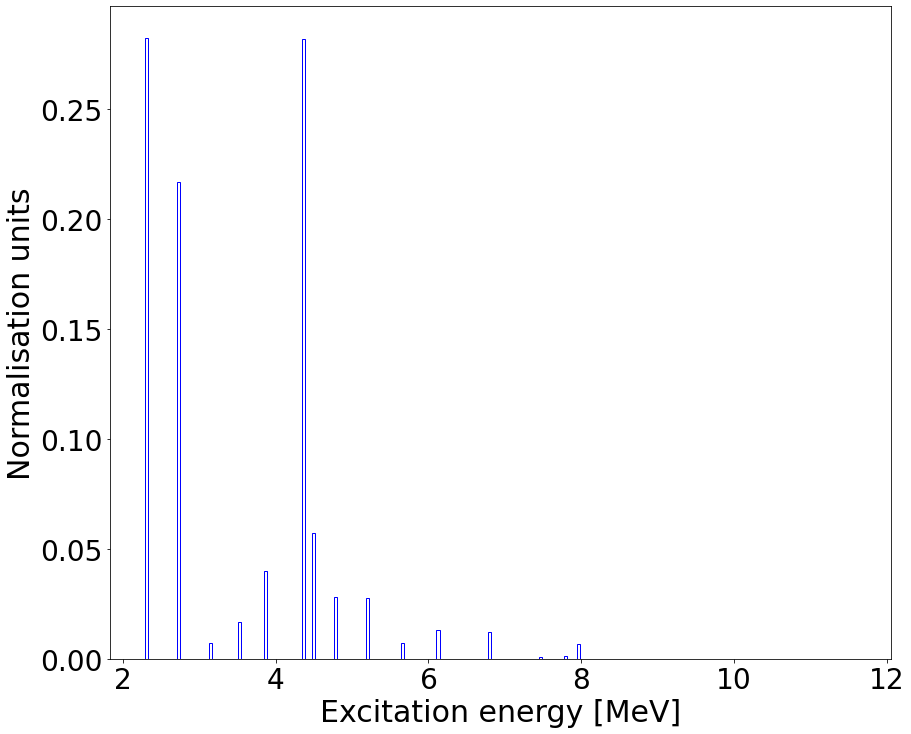

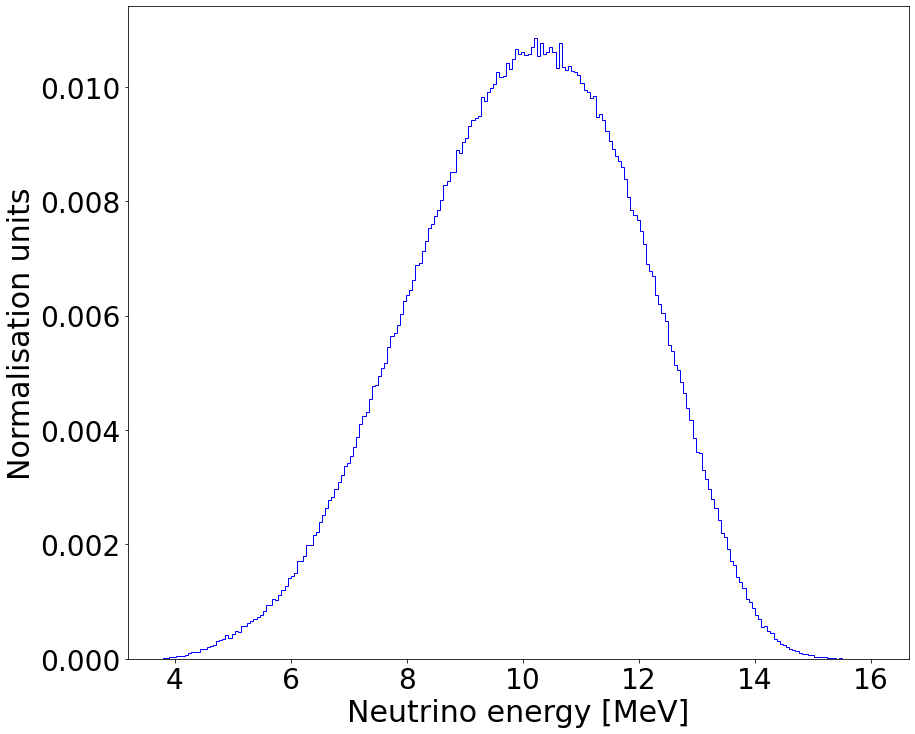

2.8405979671616493


In [3]:
plt.figure(figsize=(14,12))

data = [Ex]
rates = [1]

n, bins, patches = plt.hist(data, weights=hist_weights(rates,data), histtype='step', color='blue', bins=optim_bins(data), alpha=1)

plt.xlabel('Excitation energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()

###########################

plt.figure(figsize=(14,12))

data = [Ev]
rates = [1]

n, bins, patches = plt.hist(data, weights=hist_weights(rates,data), histtype='step', color='blue', bins=optim_bins(data), alpha=1)

plt.xlabel('Neutrino energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.show()

###########################

print(np.mean(xsec))

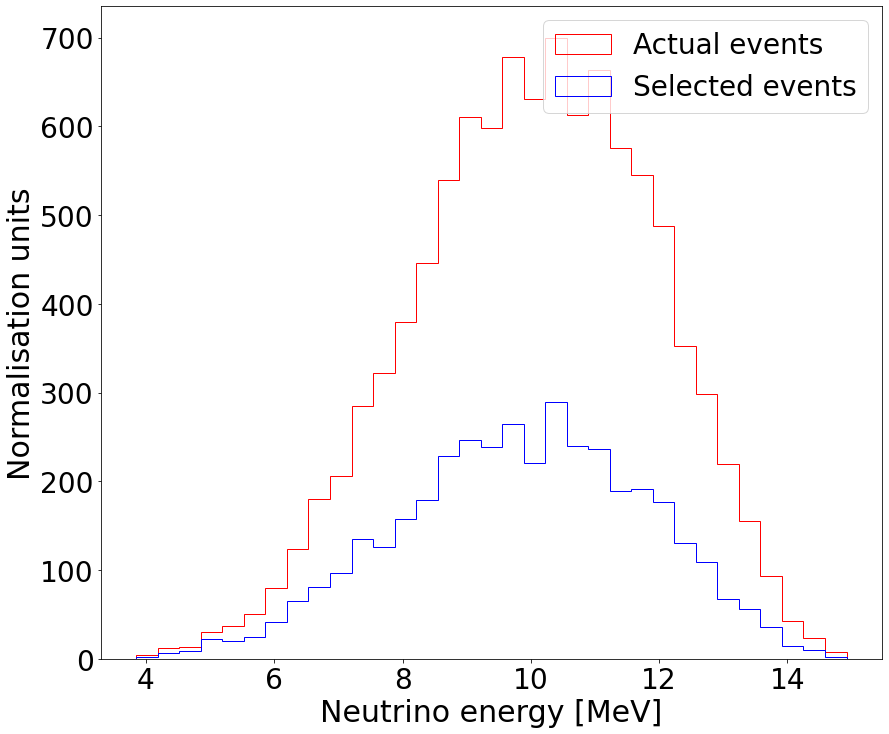

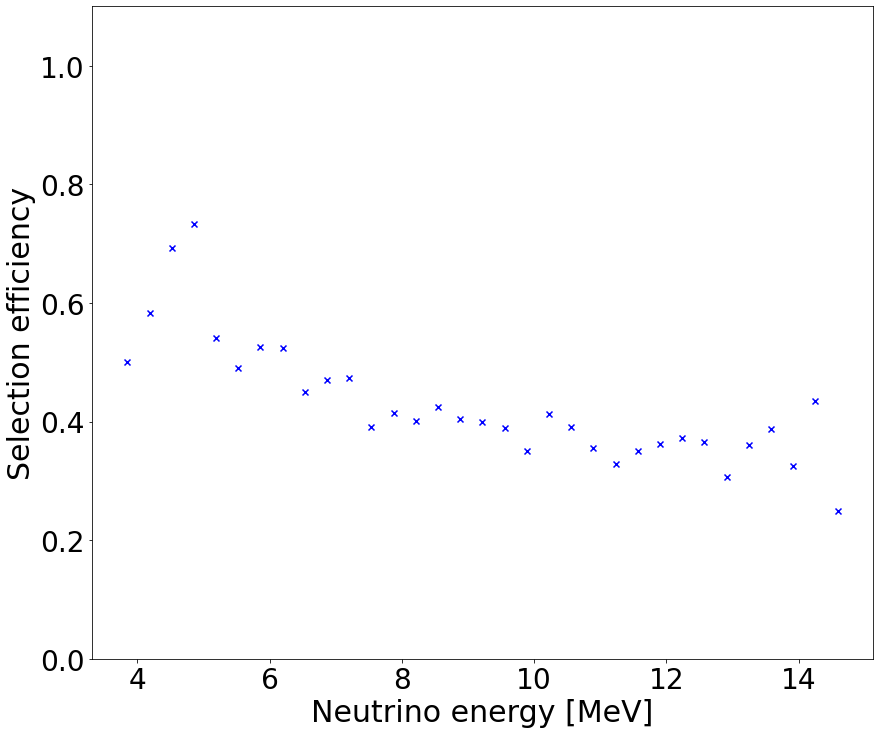

0.42921915978019426


In [5]:
numevents = 10000
data = np.concatenate([Ep[0:numevents]])

#prompt = np.array([])
selecEv = np.array([])

i = 0
for array in data:
    
    if any(1.6 < x < 1.616 for x in array):
        #prompt = np.append(prompt, KEl[i] + (np.sum(array)-1.614-0.03))
        selecEv = np.append(selecEv, Ev[i])

    i += 1
    
plt.figure(figsize=(14,12))

data = [selecEv, Ev[0:numevents]]
labels = ['Selected events', 'Actual events']

n, bins, patches = plt.hist(data, histtype='step', color=['blue', 'red'], label=labels, bins=optim_bins(data), alpha=1)

plt.xlabel('Neutrino energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalisation units',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.legend(fontsize=28)

plt.show()

#################################

plt.figure(figsize=(14,12))

seleceff = n[0]/n[1]

plt.scatter(bins[0:len(seleceff)], seleceff, color="blue", marker='x')

plt.xlabel('Neutrino energy [MeV]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Selection efficiency',fontsize=30)
plt.yticks(fontsize=28)
#plt.yscale('log')

plt.ylim(0,1.1)
#plt.legend(fontsize=28)

plt.show()


print(np.mean(seleceff))
